<a href="https://colab.research.google.com/github/lkostenko/python_da_homeworks/blob/main/hw_4_6_%D0%A2%D0%B2%D0%BE%D1%80%D1%87%D0%B5_%D0%B0%D0%BD%D0%B0%D0%BB%D1%96%D1%82%D0%B8%D1%87%D0%BD%D0%B5_%D0%B7%D0%B0%D0%B2%D0%B4%D0%B0%D0%BD%D0%BD%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot`, `seaborn` та `pandas`.  Завантажте дані з файла `yulu_rental.csv` у `pandas.DataFrame` `df`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = ("/content/drive/MyDrive/курс Аналітик/Модуль 4. Візуалізація даних/data/yulu_rental.csv")
df = pd.read_csv(data_path)

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


1. Чи впливає швидкість вітру на кількість користувачів:

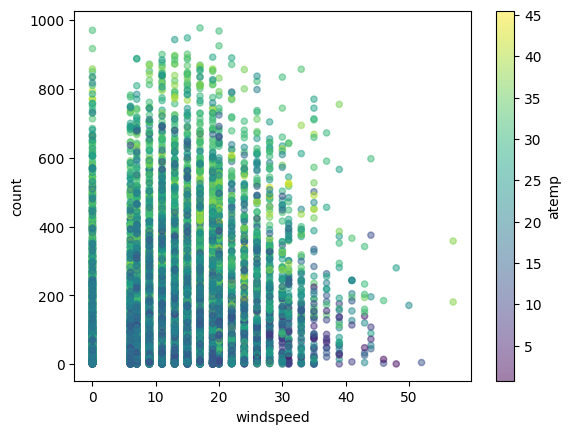

In [ ]:
df.plot.scatter(x='windspeed', y='count', alpha=0.5, c='atemp');

При низькій швидкості вітру (0–20) кількість оренд досить висока і розподілена рівномірно.
При вищих швидкостях вітру (понад 30) кількість оренд зменшується, і це логічно, адже сильний вітер може бути менш комфортним для їзди на велосипеді.


Також на графіку можна побачити більшість точок забарвлені кольорами, які відповідають температурі від 17-35 С
Холодніші температури (atemp, ближче до фіолетового) корелюють із меншою кількістю оренд.


Як змінюється попит по годинах доби для різних користувачів:

In [ ]:
df.datetime = pd.to_datetime(df.datetime)
df['date'] = df.datetime.dt.hour

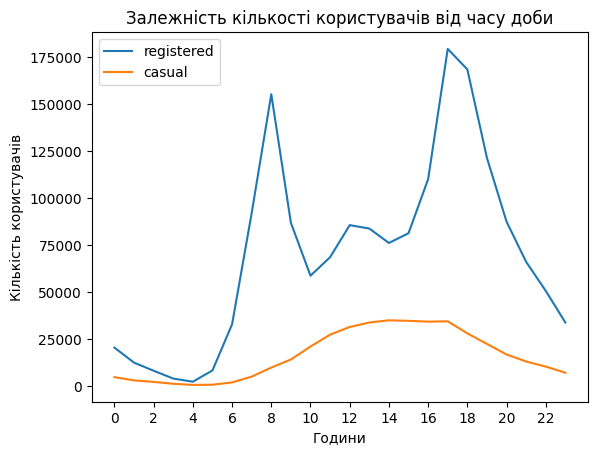

In [ ]:
df[['date', 'registered', 'casual']].groupby('date').sum().plot()
plt.xticks(range(0, 24, 2))
plt.title("Залежність кількості користувачів від часу доби")
plt.xlabel('Години')
plt.ylabel("Кількість користувачів");

In [ ]:
grouped_df = df[['date', 'registered','casual', "workingday"]].groupby(['date', "workingday"]).sum()

In [ ]:
working_day_df = grouped_df[grouped_df.index.get_level_values('workingday') == 1]
notworking_day_df = grouped_df[grouped_df.index.get_level_values('workingday') == 0]


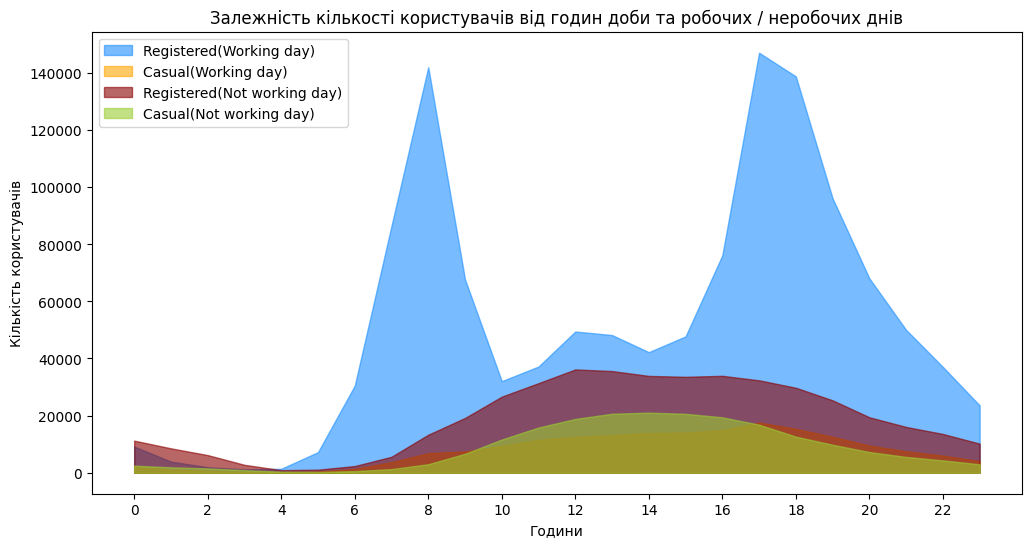

In [ ]:
plt.figure(figsize=(12, 6))
plt.fill_between(working_day_df.index.get_level_values("date"), working_day_df.registered, color='dodgerblue', alpha = .6, label = "Registered(Working day)")
plt.fill_between(working_day_df.index.get_level_values("date"), working_day_df.casual, color='orange', alpha = .6, label = "Casual(Working day)")
plt.fill_between(notworking_day_df.index.get_level_values("date"), notworking_day_df.registered, color='darkred', alpha = .6, label = "Registered(Not working day)")
plt.fill_between(notworking_day_df.index.get_level_values("date"), notworking_day_df.casual, color='yellowgreen', alpha = .6, label = "Casual(Not working day)")
plt.title('Залежність кількості користувачів від годин доби та робочих / неробочих днів')
plt.xlabel('Години')
plt.ylabel('Кількість користувачів')
plt.xticks(working_day_df.index.get_level_values('date')[::2])
plt.legend(loc='upper left');


У робочі дні активність користувачів суттєво вища порівняно з неробочими днями, особливо серед зареєстрованих користувачів.

У неробочі дні значна частина оренд здійснюється casual користувачами, що вказує на те, що люди частіше орендують велосипеди для розваг чи спонтанних поїздок.


3. Чи є залежності між кількістю зареєстрованих і незареєстрованих  оренд, температурою та погодою

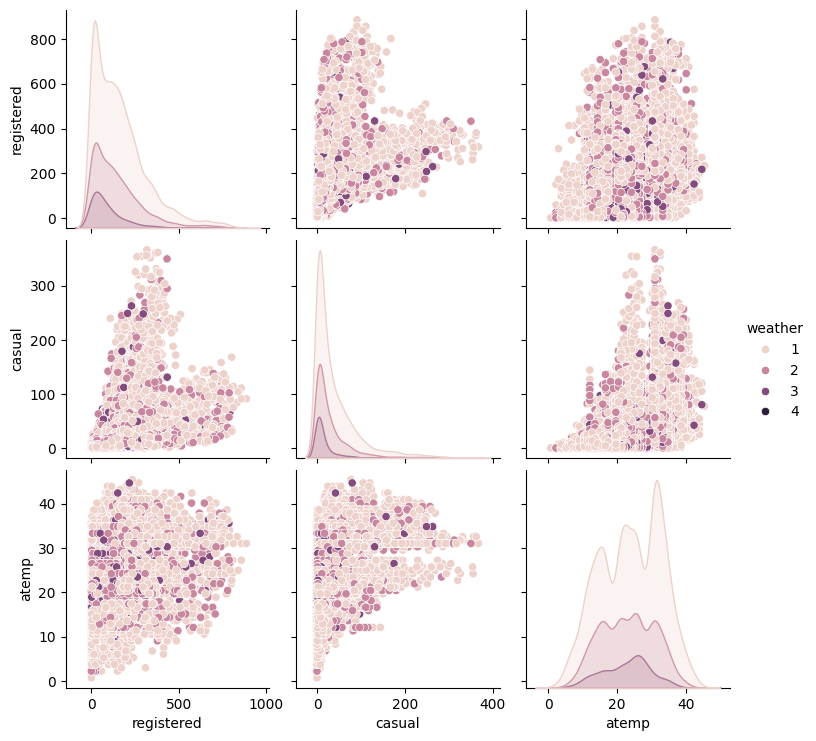

In [ ]:
sns.pairplot(data=df[['registered', 'casual', 'atemp', 'weather']], hue="weather");

Графік представляє матрицю парних діаграм (pairplot), яка демонструє залежності між змінними: registered, casual, atemp і weather. Змінна weather використовується для кольорового виділення точок залежно від погодних умов.

**Висновки:**

Основними факторами, що впливають на кількість оренд, є комфортна температура та погодні умови.

Зареєстровані користувачі частіше орендують велосипеди в пікові години, тоді як неформальні користувачі орендують більш рівномірно.

За несприятливої погоди оренда велосипедів суттєво зменшується як для зареєстрованих, так і для неформальних користувачів.
